### Install Initial Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

### Load Dataset

This dataset contains over 8600 rows of data, on each row is a person’s:
- Type (This persons 4 letter MBTI code/type)
- A section of each of the last 50 things they have posted (Each entry separated by "|||" (3 pipe characters))

The dataset was taken from Kaggle, but the data itself was collected through the PersonalityCafe forum (http://personalitycafe.com/forum/). The purpose of this dataset is to help see if any patterns can be detected in specific types and their style of writing.

In [2]:
import os

CSV_DATA_PATH = os.path.join("data", "mbti_1.csv")

def load_csv_data(csv_file_path: str = CSV_DATA_PATH) -> pd.DataFrame:
    """ Load data from a given csv file into a pandas DataFrame object.

    Args:
    - csv_file_path (str) - The file path of the csv file containing the desired data to load into a pandas DataFrame object.

    Returns:
    - data (pandas.DataFrame) - The loaded data as a pandas DataFrame object.
    """
    assert csv_file_path.endswith(".csv")

    return pd.read_csv(csv_file_path)

In [3]:
data = load_csv_data()
data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [4]:
data["posts"].iloc[0]

"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [6]:
# Quick check for duplicated rows
duplication_bool_series = data.duplicated()
duplication_bool_series.sum()

0

### Initial Data Analysis

##### Personality Factors

In [7]:
def get_personality_factors(personality_dataset: pd.DataFrame, personalities_col_name: str = "type") -> dict:
    """ Return a dictionary containing the personality factors from the given pandas DataFrame containing Myers Briggs personalities.

    Args:
    - personality_dataset (pandas.DataFrame) - The pandas DataFrame object containing the Myers Briggs personalities data.
    - personalities_col_name (str) - The name of the column which contains the Myers Briggs personalities in the given DataFrame.

    Returns:
    - personality_factors_dict (dict) - A dictionary containing the number personality factors, split into Extraversion vs Introversion, Sensing vs Intuition, Thinking vs Feeling, Judging vs Perceiving.
    """
    personality_factors_dict = {
        "e_vs_i": [],
        "s_vs_n": [],
        "t_vs_f": [],
        "j_vs_p": []
    }

    for index, row in personality_dataset.iterrows():
        personality_type_str = row[personalities_col_name]
        e_vs_i = personality_type_str[0]
        s_vs_n = personality_type_str[1]
        t_vs_f = personality_type_str[2]
        j_vs_p = personality_type_str[3]

        personality_factors_dict["e_vs_i"].append(e_vs_i)
        personality_factors_dict["s_vs_n"].append(s_vs_n)
        personality_factors_dict["t_vs_f"].append(t_vs_f)
        personality_factors_dict["j_vs_p"].append(j_vs_p)

    return personality_factors_dict    

In [8]:
from itertools import zip_longest

personality_factors_dict = get_personality_factors(data)

columns = personality_factors_dict.keys()
values = list(zip_longest(*personality_factors_dict.values()))
personality_factors = pd.DataFrame(values, columns=columns)
personality_factors.head()

,e_vs_i,s_vs_n,t_vs_f,j_vs_p
0,I,N,F,J
1,E,N,T,P
2,I,N,T,P
3,I,N,T,J
4,E,N,T,J


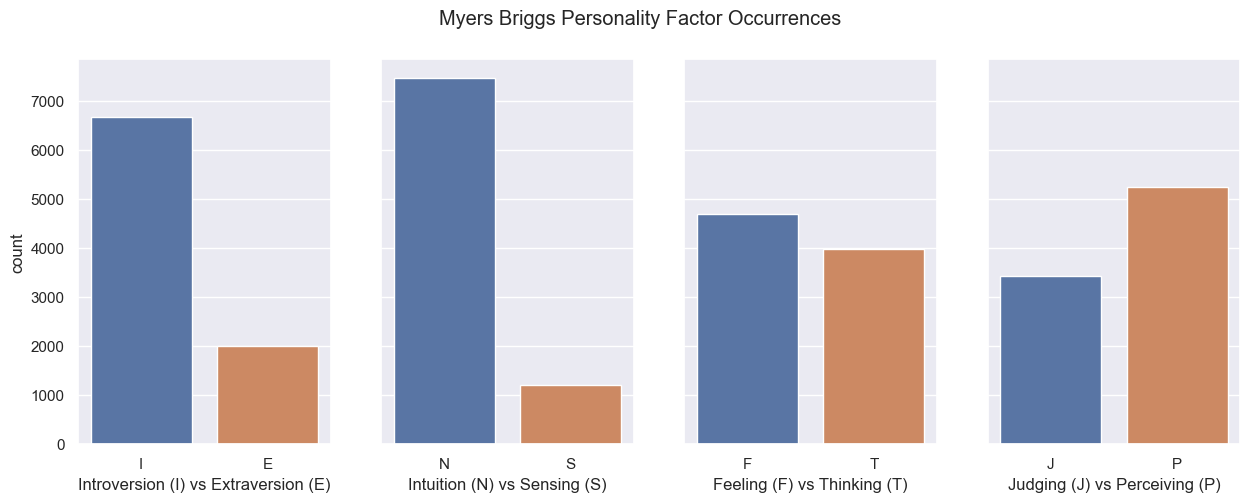

In [9]:
sns.set()

fig, axes = plt.subplots(1, 4, figsize=(15,5), sharey=True)

sns.countplot(data=personality_factors, x="e_vs_i", ax=axes[0])
sns.countplot(data=personality_factors, x="s_vs_n", ax=axes[1])
sns.countplot(data=personality_factors, x="t_vs_f", ax=axes[2])
sns.countplot(data=personality_factors, x="j_vs_p", ax=axes[3])

fig.suptitle("Myers Briggs Personality Factor Occurrences")
axes[0].set_xlabel("Introversion (I) vs Extraversion (E)")
axes[1].set_xlabel("Intuition (N) vs Sensing (S)")
axes[1].set_ylabel("")
axes[2].set_xlabel("Feeling (F) vs Thinking (T)")
axes[2].set_ylabel("")
axes[3].set_xlabel("Judging (J) vs Perceiving (P)")
axes[3].set_ylabel("")

plt.show()

From the above bar plots of the occurances of each of the Myers Briggs personality factors in the given dataset, we can observe the following:
- Significant class imbalances within Extraversion/Introversion and Intuition/Sensing factors.
- Slight class imbalance within Judging/Perceiving factors.
- Not much imbalance within Feeling/Thinking factors.

The dataset is made up of a user's personality type and their most recent 50 comments online for each observation. Therefore, the above graphs might be suggesting that people with Introversion personality factors may make more online posts than Extroverted counterparts by a significant proportion. The same could be suggested for those with Intuition factors against Sensing counterparts, as well as for those with Judging against Perceiving counterparts.

##### Personality Types

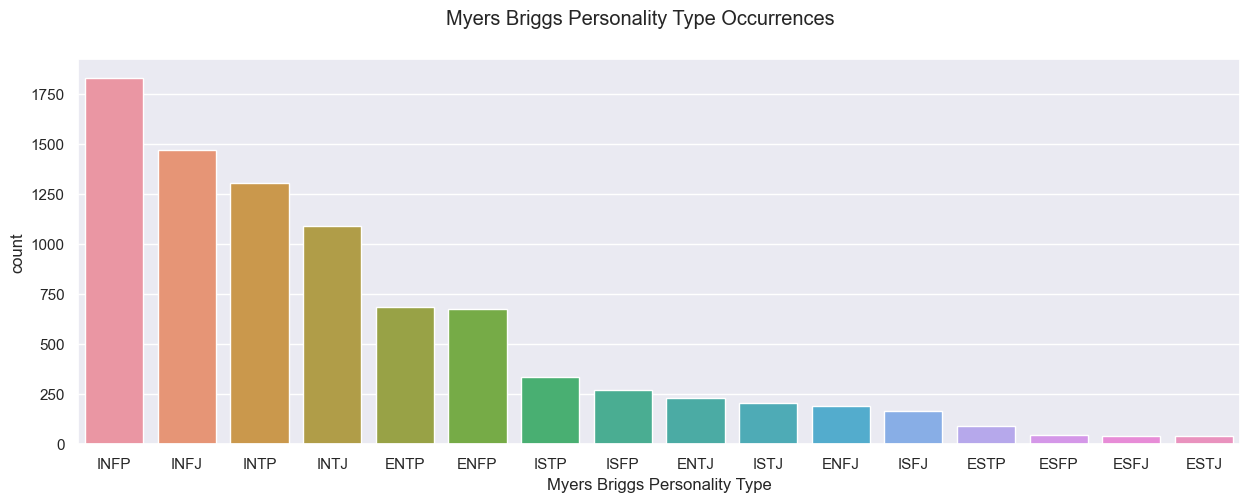

In [10]:
sns.set()

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 1, 1)

sns.countplot(data=data, x="type", ax=ax, order=data["type"].value_counts().index)

fig.suptitle("Myers Briggs Personality Type Occurrences")
ax.set_xlabel("Myers Briggs Personality Type")

plt.show()

From the above plot of Myers Briggs personality type occurrences, we can observe that class imbalances are also present for the actual personality types. This is likely a carry-over effect of the class imbalances observed from the actual Myers Briggs personality factors in the given dataset.

Given the nature of how the data was curated, the above graph seems to suggest people with introverted and intuitive personality types tend to make more online posts than people with other personality types. This is expected, given what was observed from analysing the previous bar graph of the individual personality factor occurrences observed in the given dataset.

##### Word Clouds

Below are word clouds generated for each word type, where the size of the words are proportional to the number of times it has been mentioned by someone of a particular personality type.

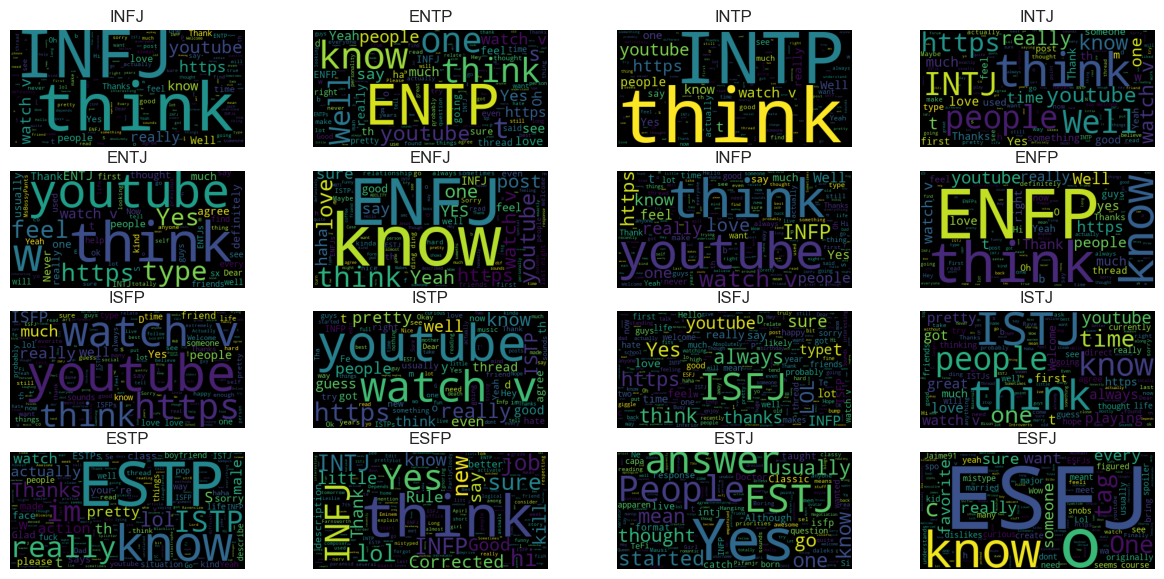

In [15]:
fig = plt.figure(figsize=(15,7))

k = 0
for i in data['type'].unique():
    temp_df = data[data['type'] == i]

    wordcloud = WordCloud(max_words=1500,relative_scaling=1,normalize_plurals=False).generate(temp_df['posts'].to_string())

    ax = fig.add_subplot(4,4,k+1)
    ax.set_title(i)
    ax.imshow(wordcloud)
    ax.axis("off")

    k+=1

plt.show()